In [13]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

mv_voltage_limit_load_case_pu = 0.05
mv_voltage_limit_feedin_case_pu = 0.02

mv_nodes = pd.read_csv('data/ding0_grids__0_to_3608_mv_crit_nodes.csv', index_col='MV_grid_id')
mv_edges = pd.read_csv('data/ding0_grids__0_to_3608_mv_crit_edges.csv', index_col='MV_grid_id')
lv_crit_nodes = pd.read_csv('data/ding0_grids__0_to_3608_lv_crit_nodes.csv', index_col='MV_grid_id')
lv_crit_edges = pd.read_csv('data/ding0_grids__0_to_3608_lv_crit_edges.csv', index_col='MV_grid_id')

mv_nodes_filtered = mv_nodes[mv_nodes['V_res_0'].apply(lambda x: not isinstance(x, str)) | mv_nodes['V_res_1'].apply(lambda x: not isinstance(x, str))]
mv_crit_nodes = mv_nodes_filtered[(abs(mv_nodes_filtered['V_res_0'] - 1) > mv_voltage_limit_load_case_pu) | (abs(mv_nodes_filtered['V_res_1'] - 1) > mv_voltage_limit_feedin_case_pu)]

print("MV grids have {nodes} nodes in total and on avg. {avg:.0f} nodes per MV grid".format(nodes=len(mv_nodes), avg=len(mv_nodes)/len(mv_nodes.index.unique())))
print("MV grids have {edges} edges in total and on avg. {avg:.0f} edges per MV grid".format(edges=len(mv_edges), avg=len(mv_edges)/len(mv_edges.index.unique())))
print("Out of these nodes, {number} exceed the voltage limit. These are scattered across {grids} MV grids.".format(number=len(mv_crit_nodes), grids=len(mv_crit_nodes.index.unique())))

print("\n\n")
print("Out of 500k+ {grids} LV grids have nodes with voltage violations. These are in total {nodes} nodes with voltage violations and on avg. {avg:.0f} nodes per LV grid".format(nodes=len(lv_crit_nodes), avg=len(lv_crit_nodes)/len(lv_crit_nodes.index.unique()),grids=len(lv_crit_nodes.index.unique())))
print("Out of 500k+ {grids} LV grids have edges with current exceeding the limit. These are in total {edges} on avg. {avg:.0f} edges per LV grid".format(edges=len(lv_crit_edges), avg=len(lv_crit_edges)/len(lv_crit_edges.index.unique()),grids=len(lv_crit_edges.index.unique())))

lv_crit_nodes_filtered = lv_crit_nodes[lv_crit_nodes['v_diff_0'].apply(lambda x: not isinstance(x, str)) | lv_crit_nodes['v_diff_1'].apply(lambda x: not isinstance(x, str))]
print(len(lv_crit_nodes_filtered))

/home/guido/miniconda3/envs/vis-tutorial/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


MV grids have 695721 nodes in total and on avg. 205 nodes per MV grid
MV grids have 564778 edges in total and on avg. 166 edges per MV grid
Out of these nodes, 23191 exceed the voltage limit. These are scattered across 1031 MV grids.



Out of 500k+ 2943 LV grids have nodes with voltage violations. These are in total 160670 nodes with voltage violations and on avg. 55 nodes per LV grid
Out of 500k+ 1289 LV grids have edges with current exceeding the limit. These are in total 5748 on avg. 4 edges per LV grid
160670


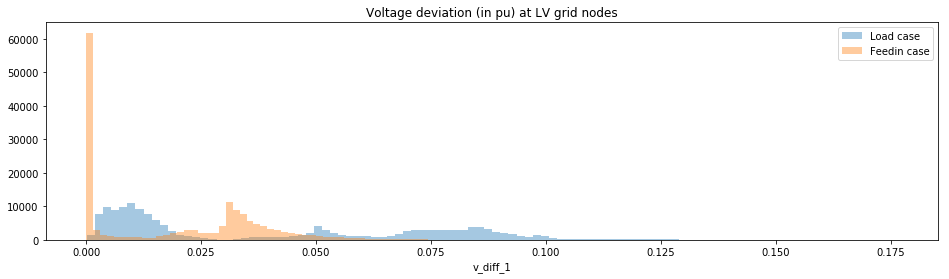

In [2]:
import seaborn as sns
fig = plt.figure(figsize=(16, 4))

sns.distplot(lv_crit_nodes_filtered['v_diff_0'], kde=False, label='Load case', bins=100)
sns.distplot(lv_crit_nodes_filtered['v_diff_1'], kde=False, label='Feedin case', bins=100)

plt.title('Voltage deviation (in pu) at LV grid nodes')
plt.legend()

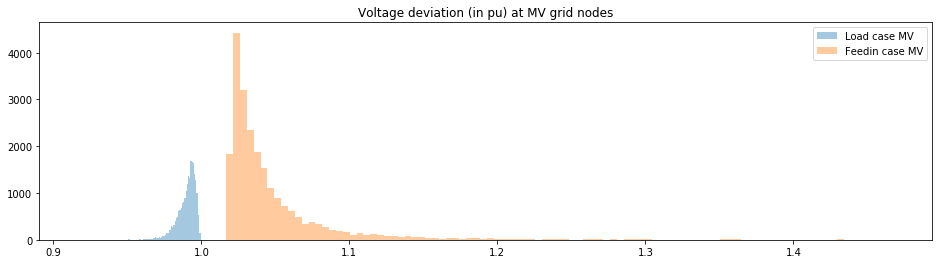

In [17]:
import seaborn as sns
fig = plt.figure(figsize=(16, 4))

mv_crit_nodes = mv_crit_nodes[(mv_crit_nodes['V_res_1'] < 2) & (mv_crit_nodes['V_res_1'] > 0)]

sns.distplot(mv_crit_nodes['V_res_0'].tolist(), kde=False, label='Load case MV', bins=100)
sns.distplot(mv_crit_nodes['V_res_1'].tolist(), kde=False, label='Feedin case MV', bins=100)

plt.title('Voltage deviation (in pu) at MV grid nodes')
plt.legend()

In [19]:
mv_voltage_limit_load_case_pu = 0.05
mv_voltage_limit_feedin_case_pu = 0.03

lv_crit_nodes_filtered[lv_crit_nodes_filtered['v_diff_1'] > mv_voltage_limit_feedin_case_pu]

,node id,LA_id,LV_grid_id,V nominal,s_max_0,s_max_1,v_diff_0,v_diff_1
MV_grid_id,,,,,,,,
2725,lv_cable_dist_1,12711,437621,400.0,NaN,NaN,0.079816,0.031609
2766,lv_cable_dist_1,100328,160600,400.0,NaN,NaN,0.086517,0.051898
2766,lv_cable_dist_1,96519,154884,400.0,NaN,NaN,0.029005,0.033448
2772,lv_cable_dist_1,129331,210905,400.0,NaN,NaN,0.088675,0.050167
2778,lv_cable_dist_1,99839,159943,400.0,NaN,NaN,0.087221,0.041888
2778,lv_cable_dist_1,99061,158881,400.0,NaN,NaN,0.096675,0.035278
188,lv_cable_dist_1,33041,484526,400.0,NaN,NaN,0.078573,0.032804
2706,lv_cable_dist_1,8302,510172,400.0,NaN,NaN,0.085365,0.047115
2710,lv_cable_dist_1,14732,454113,400.0,NaN,NaN,0.081462,0.033254
